# Connections within Area

### Create Area
### Create Connections
- Position of Matric
- Euclidean Distance
- Gaussian Distribution
- Plot the distribution
- Calculate filter of distance
- Apply the filter to the distribution
- Plot the filtered distribution

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = (17,10)

### Create Area

In [11]:
def create_area(row, column):
    """ Create an area (matrix full of 0)
    
    Args:
        - row (number of rows)
        - column (number of columns)
        
    Return:
        
        - Matrix (rows x columns)
    """
    return np.zeros((row, column))

area = create_area(25, 25)
print(area.shape)

(25, 25)


## Create connections
### Create Position of matrix


From matrix **area = (rows, columns)** to matrix **position_neurons = (rows x columns, 2)**

where positions_neurons corresponds to the position of each neurons inside the matrix (row, columns)


In [15]:
def create_matrix_position(area):
    """ Create the position of neurons in one area
    
    Args:
        - Matrix of neurons for one area
    
    Return:
        - Matrix of positions (number_horizontal x number_vertical, 2)      
            For instance array([[ 0,  0],
                                [ 0,  1],
                                .....])
    
    """
    position_neurons = pd.DataFrame()
    for i in range(0,area.shape[0]):
        position_neurons = pd.concat([position_neurons, pd.DataFrame([i]*area.shape[1])])
    position_neurons.columns = ['Row']
    position_neurons['Column'] = [k for k in range(0,area.shape[0])]*area.shape[1]
    position_neurons = position_neurons.to_numpy()
    return position_neurons

In [16]:
position_neurons = create_matrix_position(area)
position_neurons

array([[ 0,  0],
       [ 0,  1],
       [ 0,  2],
       ...,
       [24, 22],
       [24, 23],
       [24, 24]])

### Calculate Euclidean distance between each neurons of the matrix

**d(A,B) = [(xA - xB)^2 + (yA - yB)^2]^(1/2)**

In [18]:
def calculate_all_euclidean_distance(matrix_position):
    """  Calculate the euclidean distance based on the position of neurons
    
    d(A,B) = [(xA - xB)^2 + (yA - yB)^2]^(1/2)
    
    Args:
        - Matrix of positions of neurons
            (number_horizontal x number_vertical, 2)
        
    Return:
        - Matrix of euclidean neurons 
        ((number_horizontal x number_vertical), (number_horizontal x number_vertical))
    """
    pts = matrix_position
    x = np.array([pt[0] for pt in pts])
    y = np.array([pt[1] for pt in pts])
    distance = np.sqrt(np.square(x - x.reshape(-1,1)) + np.square(y - y.reshape(-1,1)))**0.5
    return distance

In [19]:
distance = calculate_all_euclidean_distance(position_neurons)
distance

array([[0.        , 1.        , 1.41421356, ..., 5.70593035, 5.7655477 ,
        5.82590126],
       [1.        , 0.        , 1.        , ..., 5.64716189, 5.70593035,
        5.7655477 ],
       [1.41421356, 1.        , 0.        , ..., 5.58936479, 5.64716189,
        5.70593035],
       ...,
       [5.70593035, 5.64716189, 5.58936479, ..., 0.        , 1.        ,
        1.41421356],
       [5.7655477 , 5.70593035, 5.64716189, ..., 1.        , 0.        ,
        1.        ],
       [5.82590126, 5.7655477 , 5.70593035, ..., 1.41421356, 1.        ,
        0.        ]])

### Calculate the Normal (Gaussian) distribution of connections
**k * exp(-(d(A,B)/sigma)^2)**

In [21]:
def normal_probability(k , e_distance, sigma):
    """ Calculate the normal probability of distribution of connections
    
        k * exp(-(d(A,B)/sigma)^2)
        
    Args:
        - k 
        - e_distance is the matrix of euclidean distance
        - sigma
        
    Return:
        - Matrix of normal probability of connections for each neurons  
    """
    
    prob_density = np.zeros((distance.shape[0], distance.shape[1]))
    for i in range(0, e_distance.shape[1]):
        prob_density[:,i] = k * np.exp(-(e_distance[:,i]/sigma)**2)
        
    return prob_density


In [22]:
prob_density = normal_probability(0.15 , distance, 4.5)
prob_density

array([[0.15      , 0.14277252, 0.13589328, ..., 0.03004964, 0.02905172,
        0.0280652 ],
       [0.14277252, 0.15      , 0.14277252, ..., 0.03105621, 0.03004964,
        0.02905172],
       [0.13589328, 0.14277252, 0.15      , ..., 0.03206836, 0.03105621,
        0.03004964],
       ...,
       [0.03004964, 0.03105621, 0.03206836, ..., 0.15      , 0.14277252,
        0.13589328],
       [0.02905172, 0.03004964, 0.03105621, ..., 0.14277252, 0.15      ,
        0.14277252],
       [0.0280652 , 0.02905172, 0.03004964, ..., 0.13589328, 0.14277252,
        0.15      ]])

### Plot the distribution of connection for a given neuron

In [31]:
def plot_probability_connection(row, column, prob_density):
    """" Plot the probability of connection as heat map
    
    Args:
        - Row of the desired neuron
        - Column of the desired neuron
        - Matrix of probability
    
    Return:
        - Heat map of distribution
    
    
    """
    proba_row_col = pd.DataFrame(prob_density[:,((25*row)+column)].reshape(area.shape[0],area.shape[1]))
    ax = plt.axes()
    sns.heatmap(proba_row_col, ax = ax)
    plt.title('Neuron of Row: '+ str(row)+ '   and Column: ' +str(column))
    plt.show()

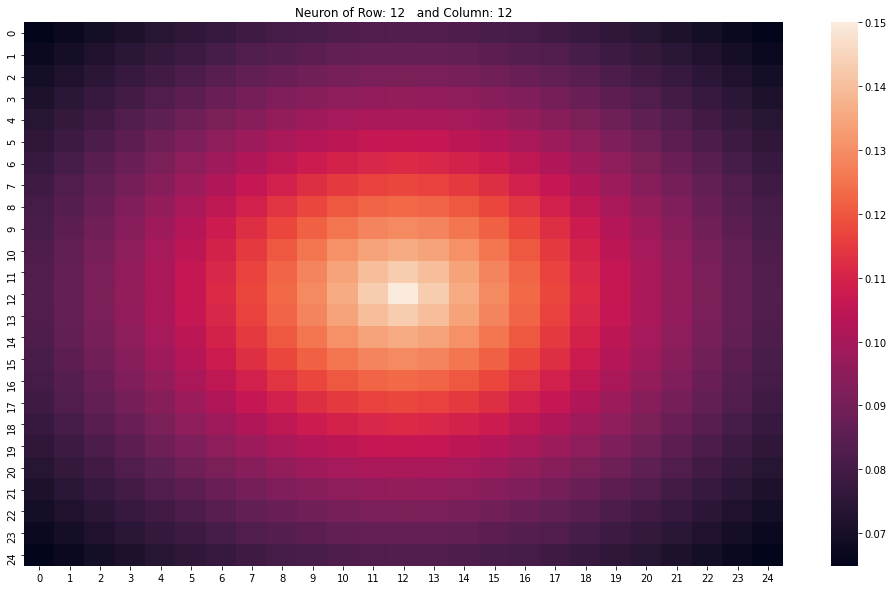

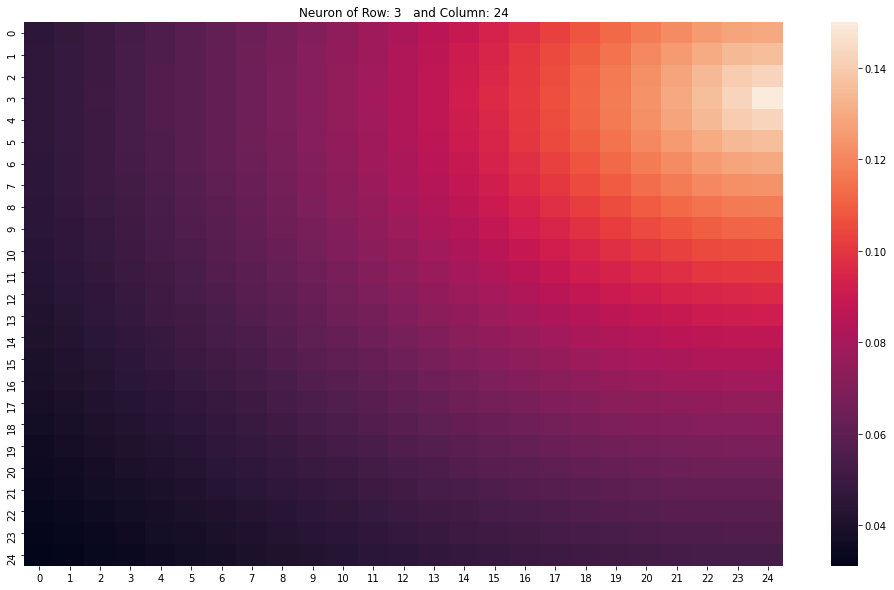

In [33]:
row = 12
column = 12

plot_probability_connection(row, column, prob_density)


row = 3
column = 24

plot_probability_connection(row, column, prob_density)

### Calculate the square matrix for filter
**sq(A,B) = max(|xA - xB|, |yA - yB|)**

In [39]:
def calculate_max_sq(matrix_position):
    """ Calculate sq(A,B)
    
            sq(A,B) = max(|xA - xB|, |yA - yB|)
    
    Args:
        - Matrix of positions of neurons 
            (number_horizontal x number_vertical, 2)
            
    Return:
        - Matrix of euclidean neurons 
        ((number_horizontal x number_vertical), (number_horizontal x number_vertical))
        
    """
    pts = matrix_position
    x = np.array([pt[0] for pt in pts])
    y = np.array([pt[1] for pt in pts])
    nx = np.abs(x - x.reshape(-1,1))
    ny = np.abs(y - y.reshape(-1,1))
    max_nx_ny = np.zeros((pts.shape[0], pts.shape[0]))
    for i in range(0,nx.shape[0]):
        for j in range(0,ny.shape[1]):
            max_nx_ny[i,j] = max(nx[i,j], ny[i,j])
    return max_nx_ny

In [40]:
sq_matrix = calculate_max_sq(position_neurons)
sq_matrix

array([[ 0.,  1.,  2., ..., 24., 24., 24.],
       [ 1.,  0.,  1., ..., 24., 24., 24.],
       [ 2.,  1.,  0., ..., 24., 24., 24.],
       ...,
       [24., 24., 24., ...,  0.,  1.,  2.],
       [24., 24., 24., ...,  1.,  0.,  1.],
       [24., 24., 24., ...,  2.,  1.,  0.]])

### Apply the filter to the previous probability of connections

In [45]:
def apply_filter_square(sq_matrix, prob_density, phi):
    """" Apply the filter square based on the value phi
    
    Args:
        - sq_matrix
        - prob_density
        - phi
        
    Return:
        - prob_density filtered
    
    """
    prob_density_filtered = prob_density * (sq_matrix< phi)*1
    return prob_density_filtered

In [46]:
prob_density_filtered = apply_filter_square(sq_matrix, prob_density, 19)
prob_density_filtered

array([[0.15      , 0.14277252, 0.13589328, ..., 0.        , 0.        ,
        0.        ],
       [0.14277252, 0.15      , 0.14277252, ..., 0.        , 0.        ,
        0.        ],
       [0.13589328, 0.14277252, 0.15      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.15      , 0.14277252,
        0.13589328],
       [0.        , 0.        , 0.        , ..., 0.14277252, 0.15      ,
        0.14277252],
       [0.        , 0.        , 0.        , ..., 0.13589328, 0.14277252,
        0.15      ]])

### Plot the new distribution of connection for a given neuron after filtering

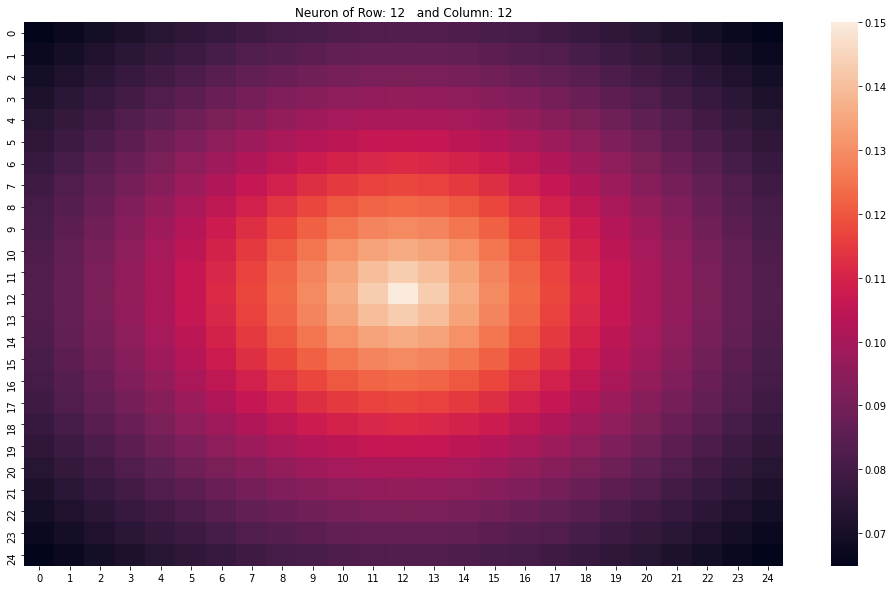

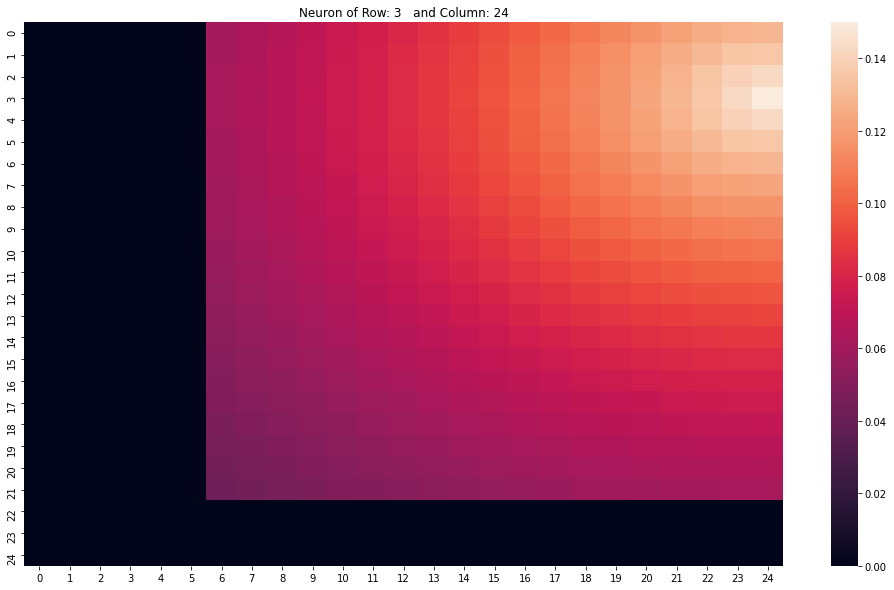

In [47]:
row = 12
column = 12

plot_probability_connection(row, column, prob_density_filtered)


row = 3
column = 24

plot_probability_connection(row, column, prob_density_filtered)